In [11]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

abs_path = os.walk(r".\intervalDataset")

dataSet = np.zeros((40, 280, 320))
i = 0
for path, dir_list, file_list in abs_path:
    for file_name in file_list:
        print(os.path.join(path, file_name))
        pil_img = Image.open(os.path.join(path, file_name))
        np_img = np.array(pil_img)
        dataSet[i] = np_img
        i += 1

.\intervalDataset\001\L\S1001L01.jpg
.\intervalDataset\001\L\S1001L02.jpg
.\intervalDataset\001\L\S1001L03.jpg
.\intervalDataset\001\L\S1001L04.jpg
.\intervalDataset\001\L\S1001L05.jpg
.\intervalDataset\001\L\S1001L06.jpg
.\intervalDataset\001\L\S1001L07.jpg
.\intervalDataset\001\L\S1001L08.jpg
.\intervalDataset\001\L\S1001L09.jpg
.\intervalDataset\001\L\S1001L10.jpg
.\intervalDataset\001\R\S1001R01.jpg
.\intervalDataset\001\R\S1001R02.jpg
.\intervalDataset\001\R\S1001R03.jpg
.\intervalDataset\001\R\S1001R04.jpg
.\intervalDataset\001\R\S1001R05.jpg
.\intervalDataset\001\R\S1001R06.jpg
.\intervalDataset\001\R\S1001R07.jpg
.\intervalDataset\001\R\S1001R08.jpg
.\intervalDataset\001\R\S1001R09.jpg
.\intervalDataset\001\R\S1001R10.jpg
.\intervalDataset\002\L\S1002L01.jpg
.\intervalDataset\002\L\S1002L02.jpg
.\intervalDataset\002\L\S1002L03.jpg
.\intervalDataset\002\L\S1002L04.jpg
.\intervalDataset\002\L\S1002L05.jpg
.\intervalDataset\002\L\S1002L06.jpg
.\intervalDataset\002\L\S1002L07.jpg
.

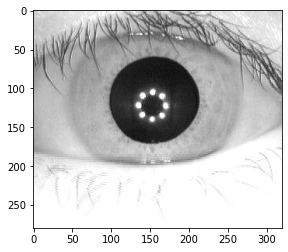

In [4]:
plt.imshow(dataSet[0, :, :], cmap='gray')
plt.show()

Canny边缘检测

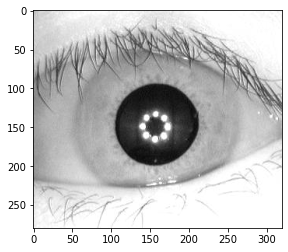

In [41]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("./intervalDataset/001/L/S1001L05.jpg", 0)
plt.imshow(img, cmap='gray')
# img = cv2.GaussianBlur(img, (3, 3), 0)
# ret, img = cv2.threshold(img, cv2.THRESH_OTSU, 255, cv2.THRESH_BINARY)
img = cv2.Canny(img, 45, 110)

# cv2.imshow('Canny', img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

二值化检测中心点

In [15]:
img = cv2.imread("./intervalDataset/001/R/S1001R08.jpg", 0)

ret, img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
img = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
img = cv2.bitwise_not(img)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (10, 10))
img = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
col_sum = np.sum(img, axis=0)  # 按列求和
row_sum = np.sum(img, axis=1)  # 按行求和
col_min = np.argmax(col_sum)
row_min = np.argmax(row_sum)
center = np.array((np.argmax(col_sum), np.argmax(row_sum)))
cv2.circle(img, (col_min, row_min), 2, (0, 0, 0), 3)
cv2.imshow('Canny', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

霍夫圆检测

In [24]:
img = cv2.imread("./intervalDataset/001/R/S1001R08.jpg", 0)
img = cv2.GaussianBlur(img, (3, 3), 0)
img = cv2.Canny(img, 45, 110)

cimg = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
circles = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 2, 50,
                           param1=110, param2=20, minRadius=10, maxRadius=130)
circles = np.uint16(np.around(circles))
distance = np.zeros(len(circles[0]))
for index, value in enumerate(circles[0, :]):
    distance[index] = np.linalg.norm(center - np.array((value[0], value[1])))
center = np.argmin(distance)
shortest = circles[0][center]
for shortest in circles[0, :]:
    # draw the outer circle
    cv2.circle(cimg, (shortest[0], shortest[1]), shortest[2], (0, 255, 0), 2)
    # draw the center of the circle
    cv2.circle(cimg, (shortest[0], shortest[1]), 2, (0, 0, 255), 3)
cv2.circle(cimg, (col_min, row_min), 2, (255, 0, 0), 3)
cv2.imshow('detected circles', cimg)
cv2.waitKey(0)
cv2.destroyAllWindows()

inner整合

In [1]:
import cv2
from util.innerCircle import innerCircle

img = cv2.imread("./intervalDataset/001/L/S1001L01.jpg", 0)
cimg = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

# center = getCenter(img)
inner = innerCircle(img)
# draw the outer circle
cv2.circle(cimg, (inner[0], inner[1]), inner[2], (0, 255, 0), 2)
# draw the center of the circle
cv2.circle(cimg, (inner[0], inner[1]), 2, (0, 0, 255), 3)
# cv2.circle(cimg, (col_min, row_min), 2, (255, 0, 0), 3)
cv2.imshow('detected circles', cimg)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [36]:
import numpy as np
from cv2 import CV_32F

# img = cv2.imread("./intervalDataset/001/L/S1001L01.jpg", 0)
# img = cv2.GaussianBlur(img, (3, 3), 0)
# # clip_img = cv2.Canny(clip_img, 10, 50)
# kernel1 = np.array((
#     [0, 0, 0],
#     [-1, 0, 1],
#     [0, 0, 0]), dtype="float32")
# kernel2 = np.array((
#     [0, -1, 0],
#     [0, 0, 0],
#     [0, 1, 0]), dtype="float32")
# kernel3 = np.array((
#     [-1, 0, 0],
#     [0, 0, 0],
#     [0, 0, 1]), dtype="float32")
# kernel4 = np.array((
#     [0, 0, -1],
#     [0, 0, 0],
#     [1, 0, 0]), dtype="float32")
# img1 = cv2.filter2D(img, CV_32F, kernel1)
# img2 = cv2.filter2D(img, CV_32F, kernel2)
# img3 = cv2.filter2D(img, CV_32F, kernel3)
# img4 = cv2.filter2D(img, CV_32F, kernel4)
# X_img = img1 + 0.5 * (img3 + img4)
# Y_img = img2 + 0.5 * (img3 - img4)
# Grad_img = np.sqrt(np.square(X_img) + np.square(Y_img))
# Grad_img = cv2.convertScaleAbs(Grad_img)
# Grad_img = cv2.equalizeHist(Grad_img)
# cv2.imshow('Grad_img', Grad_img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

inner、outer整合

In [7]:
import numpy as np
import cv2
from util.innerCircle import innerCircle
from util.outerCircle import outerCircle
from util.visualization import displayCircle

In [8]:
%%time

img = cv2.imread("./intervalDataset/001/L/S1001L01.jpg", 0)
inner = innerCircle(img)
outer = outerCircle(img, inner)
displayCircle(img, inner[0], inner[1], inner[2], outer[0], outer[1], outer[2])

Wall time: 1.91 s


去掉眼皮

In [140]:
# img = cv2.imread("./intervalDataset/001/R/S1001R01.jpg", 0)
# img = cv2.bilateralFilter(img, 9, 75, 75)
# img = cv2.GaussianBlur(img, (11, 11), 0)
# img = cv2.medianBlur(img, 11)
# # img = cv2.equalizeHist(img)
# # img = cv2.Canny(img, threshold1=15, threshold2=35, L2gradient=True)
# img = cv2.Sobel(img, -1, 0, 1, ksize=3)
# ret, img = cv2.threshold(img, 15, 255, cv2.THRESH_BINARY)
# cv2.imshow('img_y', img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

规范化

In [9]:
from util.normalize import normalize

height = 40
width = 512
polar_array, polar_noise = normalize(img, outer[0], outer[1], outer[2], inner[0], inner[1], inner[2], height, width)
cv2.imshow('polar_array', polar_array)
cv2.waitKey(0)
cv2.destroyAllWindows()

一维静态小波变换

In [10]:
import pywt

level = 7
swt_list = np.zeros((height, level + 1, width))
for index, value in enumerate(polar_array):
    # cA7, cD7, cD6, cD5, cD4, cD3, cD2, cD1
    swt_coeffs = pywt.swt(data=value, wavelet='db3', level=level, trim_approx=True)
    swt_list[index] = np.array(swt_coeffs)

特征二值化

In [11]:
for i in swt_list:
    for j in i:
        j[j > 0] = 1
        j[j < 0] = 0

特征可视化

In [12]:
feature_7 = swt_list[:, 1, :]
feature_6 = swt_list[:, 2, :]
feature_5 = swt_list[:, 3, :]
feature_4 = swt_list[:, 4, :]
feature_3 = swt_list[:, 5, :]
feature_2 = swt_list[:, 6, :]
feature_1 = swt_list[:, 7, :]
cv2.imshow('polar_array', polar_array)
cv2.imshow('feature_7', feature_7)
cv2.imshow('feature_6', feature_6)
cv2.imshow('feature_5', feature_5)
cv2.imshow('feature_4', feature_4)
cv2.imshow('feature_3', feature_3)
cv2.imshow('feature_2', feature_2)
cv2.imshow('feature_1', feature_1)
cv2.waitKey(0)
cv2.destroyAllWindows()

整合

In [5]:
import numpy as np
import cv2
from util.innerCircle import innerCircle
from util.outerCircle import outerCircle
from util.visualization import displayCircle
from util.normalize import normalize
from util.feature import featureMap

height = 40
width = 512
img = cv2.imread("./intervalDataset/001/L/S1001L01.jpg", 0)
inner = innerCircle(img)
outer = outerCircle(img, inner)
polar_array, polar_noise = normalize(img, outer[0], outer[1], outer[2], inner[0], inner[1], inner[2], height, width)
feature = featureMap(polar_array, wavelet='db3', level=7)
cv2.imshow('feature', feature)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [4]:
from getFeatureMap import getFeatureMap

feature_1 = getFeatureMap("./intervalDataset/001/L/S1001L01.jpg")
feature_2 = getFeatureMap("./intervalDataset/001/R/S1001R10.jpg")
feature_3 = getFeatureMap("./intervalDataset/002/L/S1002L03.jpg")
same_distance = np.count_nonzero(feature_1 !=feature_2)
diff_distance = np.count_nonzero(feature_1 !=feature_3)
print(same_distance)
print(diff_distance)


32517
31289
